<a href="https://colab.research.google.com/github/nitinranjansharma/EVA5B2/blob/main/s13/YoloV3Sample.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/theschoolofai/YoloV3.git

Cloning into 'YoloV3'...
remote: Enumerating objects: 156, done.
remote: Total 156 (delta 0), reused 0 (delta 0), pack-reused 156
Receiving objects: 100% (156/156), 12.74 MiB | 21.89 MiB/s, done.
Resolving deltas: 100% (7/7), done.


In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [1]:
!git clone https://github.com/theschoolofai/YoloV3.git

Cloning into 'YoloV3'...
remote: Enumerating objects: 156, done.
remote: Total 156 (delta 0), reused 0 (delta 0), pack-reused 156
Receiving objects: 100% (156/156), 12.74 MiB | 32.38 MiB/s, done.
Resolving deltas: 100% (7/7), done.


In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
import time
import glob
import torch
import os

from IPython.display import Image, clear_output 
print('PyTorch %s %s' % (torch.__version__, torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))

PyTorch 1.8.0+cu101 _CudaDeviceProperties(name='Tesla P100-PCIE-16GB', major=6, minor=0, total_memory=16280MB, multi_processor_count=56)


In [5]:
ls

gdrive/  sample_data/  YoloV3/


In [5]:
!cp -r /content/gdrive/MyDrive/EVA4B2/assignment13/data/data  '/content/YoloV3/data/'

In [6]:
!cp -r /content/gdrive/MyDrive/EVA4B2/assignment13/data/weights/yolov3-spp-ultralytics.pt  '/content/YoloV3/weights'

In [7]:
cd YoloV3/

/content/YoloV3


In [3]:
!ls

 annotation_tool   models.py	  results.png  'ubdivisions=1'
 cfg		   output	  runs	        utils
 data		   __pycache__	  test.py       vim.exe.stackdump
 data1		   README.md	  ting	        weights
 detect.py	   results.json   train.py


In [11]:
!python train.py --data data/assignment13/custom.data --batch 3 --cache --epochs 3 --nosave


Namespace(accumulate=4, adam=False, batch_size=3, bucket='', cache_images=True, cfg='cfg/yolov3-spp.cfg', data='data/assignment13/custom.data', device='', epochs=3, evolve=False, img_size=[512], multi_scale=False, name='', nosave=True, notest=False, rect=False, resume=False, single_cls=False, weights='weights/yolov3-spp-ultralytics.pt')
Using CUDA device0 _CudaDeviceProperties(name='Tesla P4', total_memory=7611MB)

2021-03-20 17:51:49.040677: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
Run 'tensorboard --logdir=runs' to view tensorboard at http://localhost:6006/
Model Summary: 225 layers, 6.29987e+07 parameters, 6.29987e+07 gradients
Caching labels (3034 found, 131 missing, 38 empty, 0 duplicate, for 3203 images): 100% 3203/3203 [00:00<00:00, 7070.00it/s]
Caching images (1.8GB): 100% 3203/3203 [00:19<00:00, 163.86it/s]
Caching labels (297 found, 14 missing, 7 empty, 0 duplicate, for 318 images): 100% 318/318 [00:

In [9]:
!python train.py --data data/assignment13/custom.data --batch 8 --cache --cfg cfg/yolov3-spp.cfg --epochs 30 --nosave

Namespace(accumulate=4, adam=False, batch_size=8, bucket='', cache_images=True, cfg='cfg/yolov3-spp.cfg', data='data/assignment13/custom.data', device='', epochs=30, evolve=False, img_size=[512], multi_scale=False, name='', nosave=True, notest=False, rect=False, resume=False, single_cls=False, weights='weights/yolov3-spp-ultralytics.pt')
Using CUDA device0 _CudaDeviceProperties(name='Tesla P100-PCIE-16GB', total_memory=16280MB)

2021-03-20 19:50:09.584269: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
Run 'tensorboard --logdir=runs' to view tensorboard at http://localhost:6006/
Model Summary: 225 layers, 6.25895e+07 parameters, 6.25895e+07 gradients
Caching labels (3034 found, 131 missing, 38 empty, 0 duplicate, for 3203 images): 100% 3203/3203 [00:00<00:00, 7392.65it/s]
Caching images (1.8GB): 100% 3203/3203 [00:19<00:00, 166.71it/s]
Caching labels (297 found, 14 missing, 7 empty, 0 duplicate, for 318 images): 100

In [13]:
#!python detect.py --conf-thres 0.1 --output out_out
!python detect.py --conf-thres 0.3 --output "model_out" --source "output" --names "data/assignment13/custom.names"

Namespace(agnostic_nms=False, augment=False, cfg='cfg/yolov3-spp.cfg', classes=None, conf_thres=0.3, device='', fourcc='mp4v', half=False, img_size=512, iou_thres=0.6, names='data/assignment13/custom.names', output='model_out', save_txt=False, source='output', view_img=False, weights='weights/last.pt')
Using CUDA device0 _CudaDeviceProperties(name='Tesla P100-PCIE-16GB', total_memory=16280MB)

Model Summary: 225 layers, 6.25895e+07 parameters, 6.25895e+07 gradients
image 1/2 output/out1.jpeg: 320x512 2 vests, Done. (0.016s)
image 2/2 output/out10.jpeg: 320x512 2 vests, 2 bootss, Done. (0.016s)
Results saved to /content/YoloV3/model_out
Done. (0.094s)


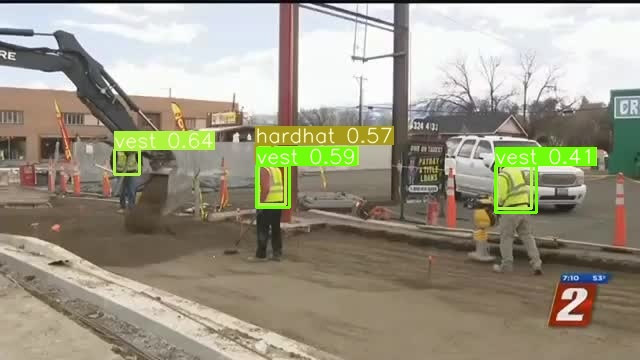

In [18]:


Image(filename='/content/YoloV3/model_out/out1.jpeg', width=600)

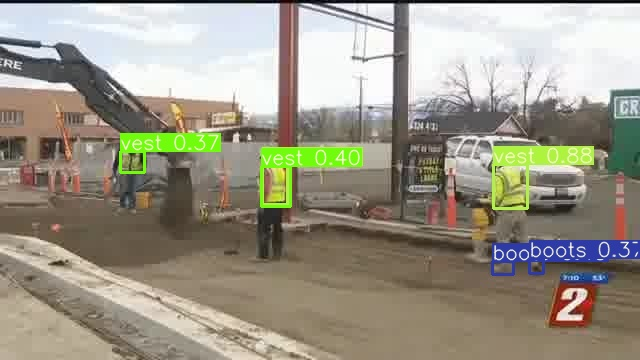

In [19]:
Image('/content/YoloV3/model_out/out10.jpeg', width=600)